In [1]:
import numpy as np
from sklearn.utils import resample

data = [2, 3, 5, 7, 11]
bootstrap_sample = resample(data)

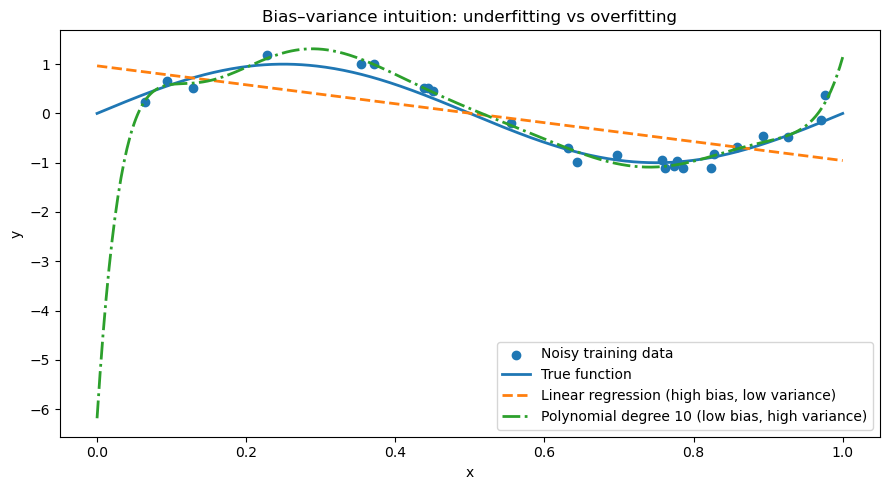

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Reproducibility
rng = np.random.default_rng(42)

# Ground-truth (unknown to the model)
def f(x):
    return np.sin(2 * np.pi * x)

# Generate a small noisy dataset (makes overfitting visible)
n = 25
X = rng.uniform(0, 1, size=n).reshape(-1, 1)
y = f(X[:, 0]) + rng.normal(0, 0.25, size=n)

# Models: low capacity (linear) vs high capacity (polynomial)
lin = Pipeline([
    ("poly", PolynomialFeatures(degree=1, include_bias=False)),
    ("model", LinearRegression())
])

poly10 = Pipeline([
    ("poly", PolynomialFeatures(degree=10, include_bias=False)),
    ("model", LinearRegression())
])

lin.fit(X, y)
poly10.fit(X, y)

# Smooth grid for plotting curves
x_grid = np.linspace(0, 1, 500).reshape(-1, 1)
y_true = f(x_grid[:, 0])

# One plot that builds intuition
plt.figure(figsize=(9, 5))
plt.scatter(X[:, 0], y, label="Noisy training data")
plt.plot(x_grid[:, 0], y_true, linewidth=2, label="True function")
plt.plot(x_grid[:, 0], lin.predict(x_grid), linestyle="--", linewidth=2,
         label="Linear regression (high bias, low variance)")
plt.plot(x_grid[:, 0], poly10.predict(x_grid), linestyle="-.", linewidth=2,
         label="Polynomial degree 10 (low bias, high variance)")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Bias–variance intuition: underfitting vs overfitting")
plt.legend()
plt.tight_layout()

# Optional: save for your book/notes
plt.savefig("bias_variance_intuition.png", dpi=300)

plt.show()


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

churn = pd.read_csv("churn.csv")

X = churn[['Age', 'AnnualIncome', 'MembershipDuration', 'Gender', 'Location']]
y = churn['Churn']

categorical_cols = ['Gender', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

classifier = RandomForestClassifier(
    n_estimators=600,         
    max_features='sqrt',      
    bootstrap=True,        
    oob_score=True,         
    n_jobs=-1,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

pipeline.fit(X, y)
pipeline

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Location'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=600, n_jobs=-1,
                                        oob_score=True, random_state=42))])

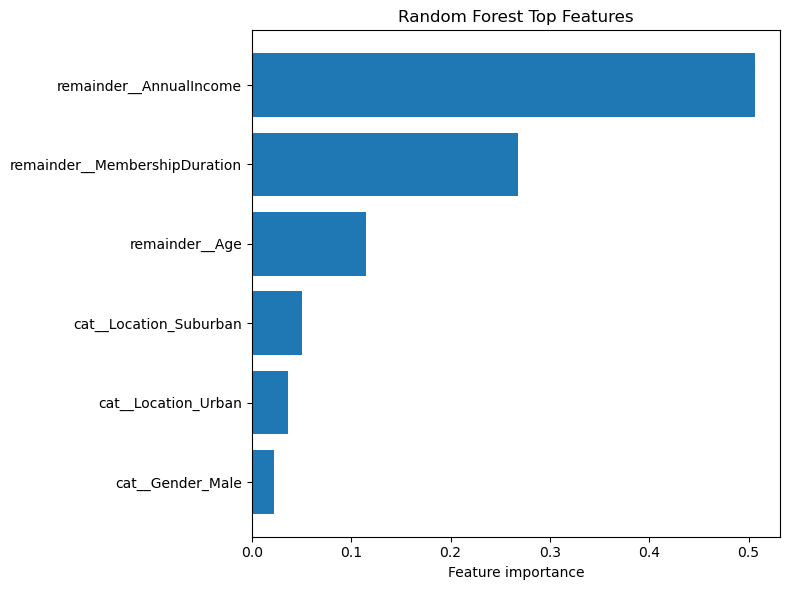

In [3]:
import matplotlib.pyplot as plt

rf = pipeline.named_steps['classifier']
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

importances = rf.feature_importances_
idx = np.argsort(importances)[::-1]
top_k = min(15, len(idx))

plt.figure(figsize=(8, 6))
plt.barh(range(top_k), importances[idx[:top_k]][::-1])
plt.yticks(range(top_k), [feature_names[i] for i in idx[:top_k]][::-1])
plt.xlabel("Feature importance")
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.show()


In [4]:
from sklearn.ensemble import ExtraTreesClassifier

classifier = ExtraTreesClassifier(
    n_estimators=600,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

pipeline.fit(X, y)
pipeline

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Location'])])),
                ('classifier',
                 ExtraTreesClassifier(n_estimators=600, n_jobs=-1,
                                      random_state=42))])

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Weak learner
base_learner = DecisionTreeClassifier(
    max_depth=1,           
    min_samples_leaf=20,  
    random_state=42
)

# AdaBoost
classifier = AdaBoostClassifier(
    estimator=base_learner, 
    n_estimators=300,      
    learning_rate=0.1,     
    random_state=42
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

pipeline.fit(X, y)
pipeline

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Location'])])),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                                     min_samples_leaf=20,
                                                                     random_state=42),
                                    learning_rate=0.1, n_estimators=300,
                                    random_state=42))])

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier(
    loss="log_loss",
    n_estimators=600,   
    learning_rate=0.1,    
    max_depth=3,        
    random_state=42
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gradient_boosting )
])

pipeline.fit(X, y)
pipeline

C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Location'])])),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=600,
                                            random_state=42))])

In [7]:
gb_early_stop = GradientBoostingClassifier(
    validation_fraction=0.2, 
    n_iter_no_change=30,     
    tol=1e-4,
    random_state=42
)


In [8]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    reg_lambda=1.0,         
    reg_alpha=0.0,          
    min_child_weight=1.0,     
    gamma=0.0,               
    tree_method="hist",       
    eval_metric="logloss",
    random_state=42
)

pipeline = Pipeline([('preprocessor', preprocessor), 
                     ('classifier', xgb)])
pipeline.fit(X, y)


C:\Users\corne\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Location'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None...
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=1.0, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [9]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

categorical_cols = ['Gender', 'Location']
numeric_cols = ['Age', 'AnnualIncome', 'MembershipDuration']

# Preprocessing for linear models
preproc_linear = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols),
    ],
    remainder='drop'
)

# Preprocessing for tree models
preproc_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)

# Base models
pipe_lr  = Pipeline([('preprocessor', preproc_linear),
                     ('model', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42))])

pipe_knn = Pipeline([('preprocessor', preproc_linear),
                     ('model', KNeighborsClassifier(n_neighbors=15))])

pipe_rf  = Pipeline([('preprocessor', preproc_tree),
                     ('model', RandomForestClassifier(n_estimators=400, random_state=42, n_jobs=-1))])

# Soft voting: average probabilities (weighted)
voter_hard = VotingClassifier(
    estimators=[('lr', pipe_lr), ('rf', pipe_rf), ('knn', pipe_knn)],
    voting='hard',
)

voter_hard.fit(X, y)
voter_hard


VotingClassifier(estimators=[('lr',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('cat',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['Gender',
                                                                                 'Location']),
                                                                               ('num',
                                                                                StandardScaler(),
                                                                                ['Age',
                                                                                 'AnnualIncome',
                                                                                 'MembershipDuration'])])),
                                              ('model',
                                               LogisticRegression(max_iter=1000,
                                                                  n_jobs=-1,
                                                                  random_state=42))])),
                             ('rf...
                                               RandomForestClassifier(n_estimators=400,
                                                                      n_jobs=-1,
                                                                      random_state=42))])),
                             ('knn',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('cat',
                                                                                OneHotEncoder(drop='first',
                                                                                              handle_unknown='ignore',
                                                                                              sparse_output=False),
                                                                                ['Gender',
                                                                                 'Location']),
                                                                               ('num',
                                                                                StandardScaler(),
                                                                                ['Age',
                                                                                 'AnnualIncome',
                                                                                 'MembershipDuration'])])),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=15))]))])

In [10]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

base = LogisticRegression(max_iter=1000, 
                          class_weight='balanced', 
                          n_jobs=-1, 
                          random_state=42
                        )
ovr = OneVsRestClassifier(base) 

pipe_ovr = Pipeline([('preprocessor',preproc_linear), 
                     ('classifier', ovr)])
pipe_ovr.fit(X, y)
pipe_ovr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Location']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'MembershipDuration'])])),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                  max_iter=1000,
                                                                  n_jobs=-1,
                                                                  random_state=42)))])

In [11]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC  

base = SVC(kernel='rbf',
           C=2.0, 
           gamma='scale', 
           probability=True, 
           random_state=42)
ovo = OneVsOneClassifier(base)  

pipe_ovo = Pipeline([('preprocessor', preproc_linear), 
                     ('classifier', ovo)])
pipe_ovo.fit(X, y)
pipe_ovo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Location']),
                                                 ('num', StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'MembershipDuration'])])),
                ('classifier',
                 OneVsOneClassifier(estimator=SVC(C=2.0, probability=True,
                                                  random_state=42)))])

In [15]:
from sklearn.ensemble import StackingClassifier

preproc_linear = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numeric_cols),
    ],
    remainder='drop'
)
preproc_tree = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)

# Base learners (level-0)
pipe_lr  = Pipeline([('preprocessor', preproc_linear),
                     ('model', LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42))])

pipe_svc = Pipeline([('preprocessor', preproc_linear),
                     ('model', SVC(kernel='rbf', C=2.0, gamma='scale', probability=True, random_state=42))])

pipe_knn = Pipeline([('preprocessor', preproc_linear),
                     ('model', KNeighborsClassifier(n_neighbors=15))])

pipe_rf  = Pipeline([('preprocessor', preproc_tree),
                     ('model', RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1))])

pipe_gb  = Pipeline([('preprocessor', preproc_tree),
                     ('model', GradientBoostingClassifier(n_estimators=600, learning_rate=0.08,
                                                         max_depth=3, subsample=0.9, random_state=42))])

estimators = [
    ('lr',  pipe_lr),
    ('svc', pipe_svc),
    ('knn', pipe_knn),
    ('rf',  pipe_rf),
    ('gb',  pipe_gb),
]

# Meta-model (level-1)
final_est = LogisticRegression(max_iter=1000, n_jobs=-1, class_weight='balanced', random_state=42)

# Stacking classifier
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=final_est,
    cv=5, 
    passthrough=False, # set True to include original features too
)

stack.fit(X, y)
stack

StackingClassifier(cv=5,
                   estimators=[('lr',
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('cat',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore',
                                                                                                sparse_output=False),
                                                                                  ['Gender',
                                                                                   'Location']),
                                                                                 ('num',
                                                                                  StandardScaler(),
                                                                                  ['Age',
                                                                                   'AnnualIncome',
                                                                                   'MembershipDuration'])])),
                                                ('model',
                                                 LogisticRegression(max_iter=1000,
                                                                    n_jobs=-1,
                                                                    random_state=42))]...
                                Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('cat',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  ['Gender',
                                                                                   'Location'])])),
                                                ('model',
                                                 GradientBoostingClassifier(learning_rate=0.08,
                                                                            n_estimators=600,
                                                                            random_state=42,
                                                                            subsample=0.9))]))],
                   final_estimator=LogisticRegression(class_weight='balanced',
                                                      max_iter=1000, n_jobs=-1,
                                                      random_state=42))